# Outlier
## Outliers are those data points that are significantly different from the rest of the dataset
<img src="pix/out.png" style="border:2px solid black">

# When are outliers dangerous?
## Outliers are not always dangerous for our problem statement. In fact, outliers sometimes can be helpful indicators.

## Senario-1: 

### Let’s we have a data of Age for population and the age of a people in that data is 356, and we know that the age value 356 is not possible, 

### so here this data point considered as an outlier and we not know what value we have to replace to this value. So, we have to remove the data point completely from our dataset.

<img src="./pix/1out.png" style="border:2px solid black" >

## Scenario-2: 

### Let’s have a use case of credit card fraud detection, outlier analysis becomes important because here, the exception rather than the rule may be of interest to the analyst.


# Effect of Outliers on ML Algorithm

* ## Linear Regression
* ## Logistic Regression
* ## AdaBoost
* ## And Also Effect on Deep Learning
* ## Etc

# How to treet Outliers ?

* ## Trimming (Remove outliers)
* ## Capping
* ## Assuming as Missing Value
* ## Descritization

In [1]:
import pandas as pd,numpy as np, matplotlib.pyplot as plt,seaborn as sns

In [2]:
data = pd.read_csv("placement.csv")
data.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


# Plot Graph

[Text(0.5, 1.0, 'Placement Exam Marks')]

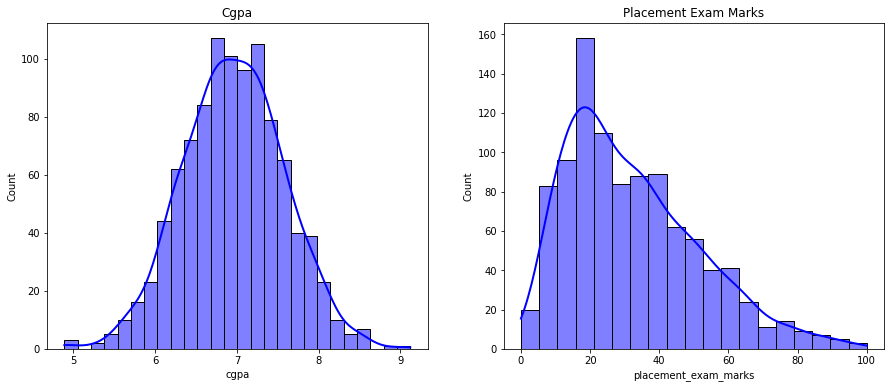

In [3]:
fig, axes = plt.subplots(1, 2, sharex=False, figsize=(15,6))
sns.histplot(data.cgpa,color="blue",kde=True,edgecolor="black",line_kws={'lw':2},ax=axes[0]).set(title='Cgpa')
sns.histplot(data.placement_exam_marks,color="blue",kde=True,edgecolor="black",line_kws={'lw':2},ax=axes[1]).set(title='Placement Exam Marks')

# Cgpa are Normal Distribution
# Placement Exam are Right Skew

In [4]:
data.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


# Find Boundary Outliers of cgpa

In [5]:
# LOW Valaue
low = data.cgpa.mean() - 3 * data.cgpa.std()
low

5.113546374602842

In [6]:
# HIGH Value
high = data.cgpa.mean() + 3 * data.cgpa.std()
high

8.808933625397177

# Detect Outliers

In [7]:
data[(data.cgpa < low) | (data.cgpa > high)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# 1 Trimming

* ## detect high and low value 
    * ## Formulae { mean - 3 STD  to mean + 3 STD }

* ## and remove the outliers

In [8]:
# cgpa greater than low ---> remove low outliers
# cgpa lower than high  ---> remove high outliers
new_data = data[(data.cgpa > low) & (data.cgpa < high)]
new_data

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


# Trimming with Z-score
<img src="pix/z-score.png">

* ## Calculate z score
    * ## Formulae z =  (x(i) - mean) / std

In [14]:
z_score = (data.cgpa - data.cgpa.mean()) / data.cgpa.std()
data["z_score"] = z_score

data

,cgpa,placement_exam_marks,placed,z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


# set boundary -3 to 3

In [17]:
# check greater 3
data[data["z_score"] > 3]

,cgpa,placement_exam_marks,placed,z_score
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [20]:
# check shorter than -3
data[data["z_score"] < -3]

,cgpa,placement_exam_marks,placed,z_score
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [29]:
# all outliers
data[(data.z_score < -3) | (data.z_score > 3)]

,cgpa,placement_exam_marks,placed,z_score
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [32]:
# trimming

new = data[(data.z_score > -3) & (data.z_score < 3)]
new

,cgpa,placement_exam_marks,placed,z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


# Capping

## Capping means change value of outliers

In [33]:
high,low

(8.808933625397177, 5.113546374602842)

In [40]:
# np.where(if true condition, Expression 1 , Expression 2 (if condition False)  )

In [51]:
cap = data.copy()

In [52]:
cap["cgpa"] = np.where(
    
    # if data.cgpa > high than replace to high
    data.cgpa > high,high,
    
        # if data.cgpa < low than replace to low
        np.where(
            data.cgpa < low,low,
            # else data.cgpa
            data.cgpa
    
    )
    

)

In [53]:
cap

,cgpa,placement_exam_marks,placed,z_score
0,7.190000,26.0,1,0.371425
1,7.460000,38.0,1,0.809810
2,7.540000,40.0,1,0.939701
3,6.420000,8.0,1,-0.878782
4,7.230000,17.0,0,0.436371
...,...,...,...,...
995,8.808934,44.0,1,3.099150
996,8.808934,65.0,1,3.505062
997,5.113546,34.0,0,-3.362960
998,8.620000,46.0,1,2.693239


In [54]:
cap.describe()

,cgpa,placement_exam_marks,placed,z_score
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,6.961499,32.225000,0.489000,-1.600275e-14
std,0.612688,19.130822,0.500129,1.000000e+00
min,5.113546,0.000000,0.000000,-3.362960e+00
25%,6.550000,17.000000,0.000000,-6.677081e-01
50%,6.960000,28.000000,0.000000,-2.013321e-03
75%,7.370000,44.000000,1.000000,6.636815e-01
max,8.808934,100.000000,1.000000,3.505062e+00


# Graphs

# Check QQ Plot

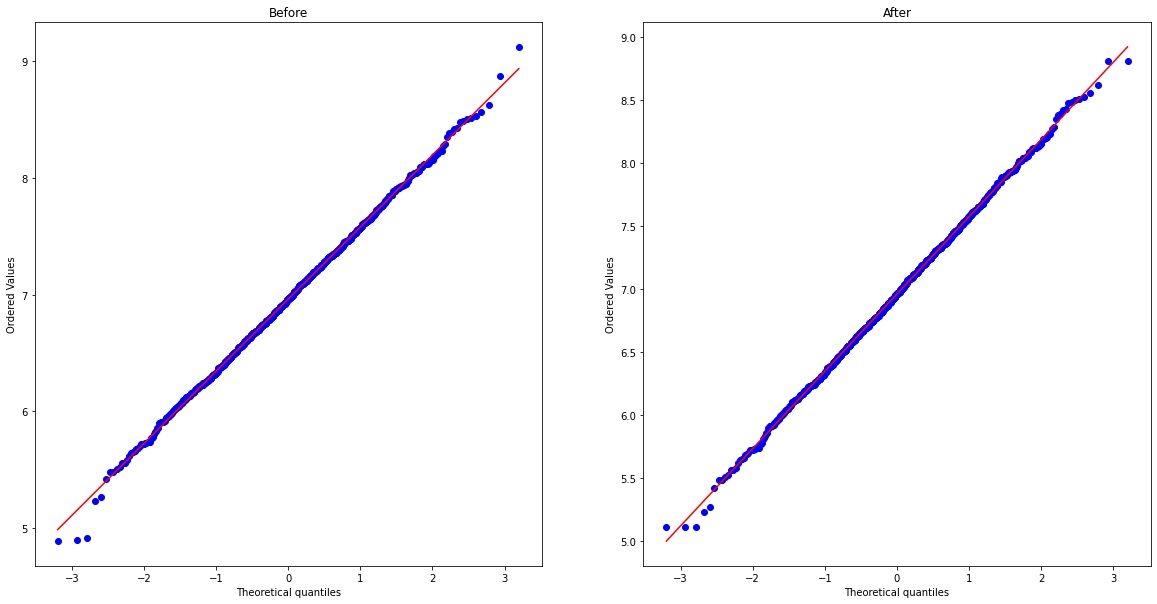

In [68]:
import scipy.stats as stats

plt.figure(figsize=(20,10))

plt.subplot(121)
stats.probplot(data.cgpa,plot=plt)
plt.title("Before")

plt.subplot(122)
stats.probplot(cap.cgpa,plot=plt)
plt.title("After")

plt.show()

# Box Plot

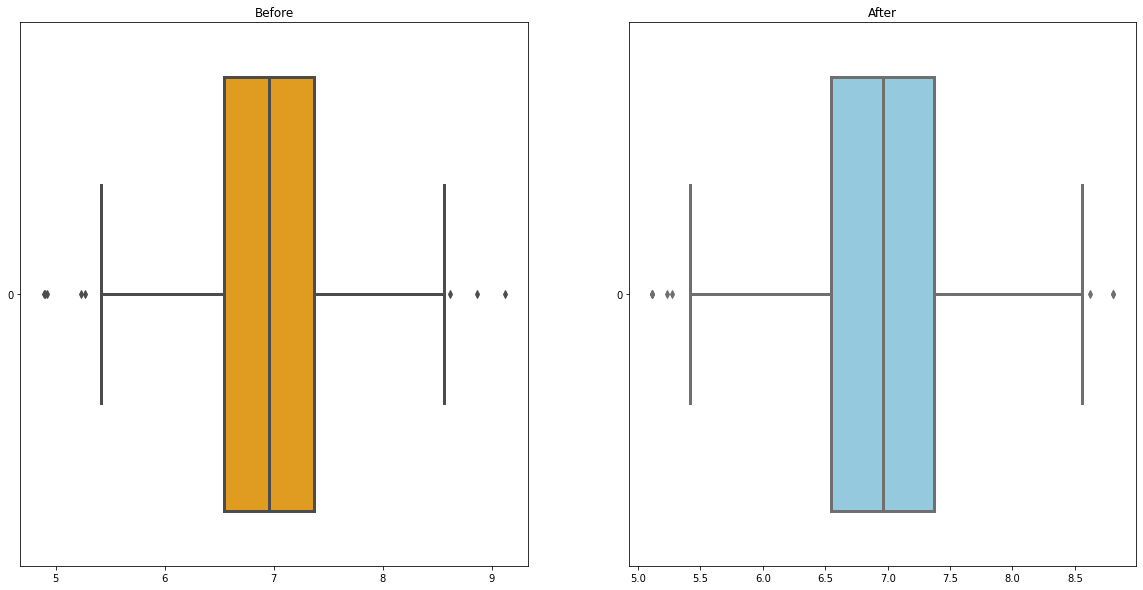

In [77]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title("Before")
sns.boxplot(data=data.cgpa,orient="h",linewidth=3,color="orange")

plt.subplot(122) 
plt.title("After")
sns.boxplot(data=cap.cgpa,orient="h",linewidth=3,color="skyblue")

plt.show()

# Hist Plot

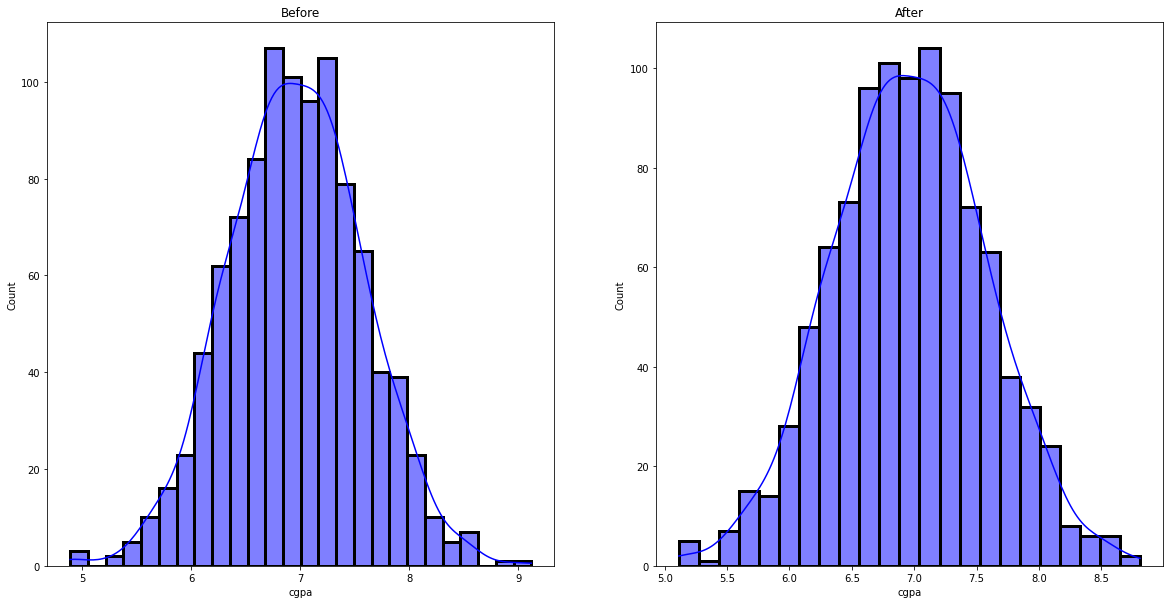

In [83]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title("Before")
sns.histplot(data=data.cgpa,linewidth=3,color="blue",kde=True,edgecolor="black")

plt.subplot(122)
plt.title("After")
sns.histplot(data=cap.cgpa,linewidth=3,color="blue",kde=True,edgecolor="black")

plt.show()

# Scatter Plot

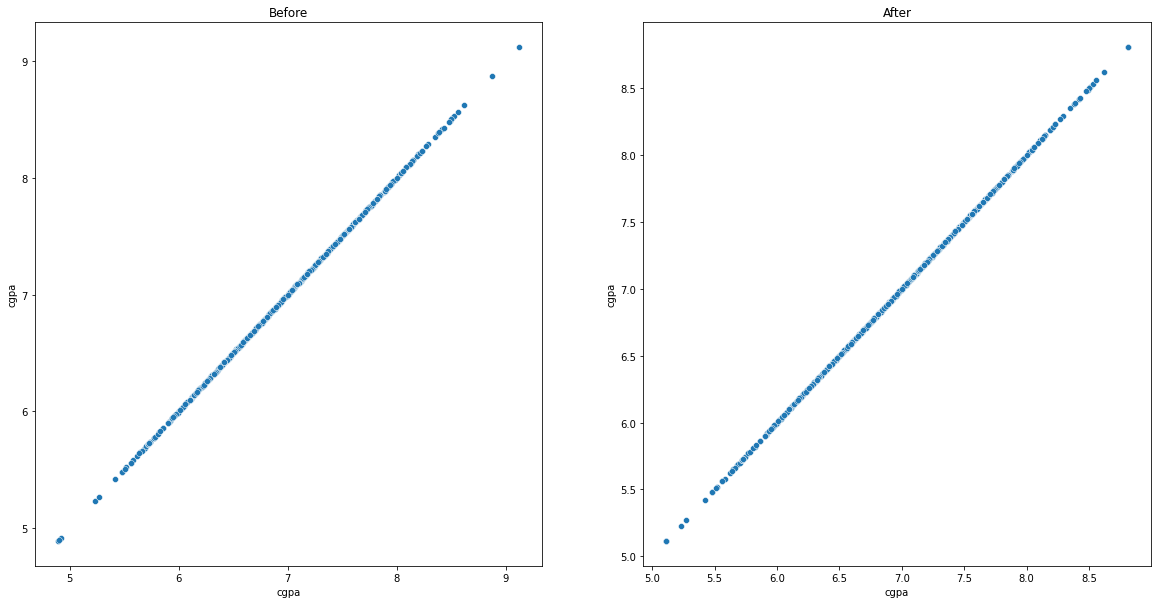

In [90]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title("Before")
sns.scatterplot(x = data.cgpa,y=data.cgpa)

plt.subplot(122)
plt.title("After")
sns.scatterplot(x = cap.cgpa,y=cap.cgpa)

plt.show()

# Boxn Plot

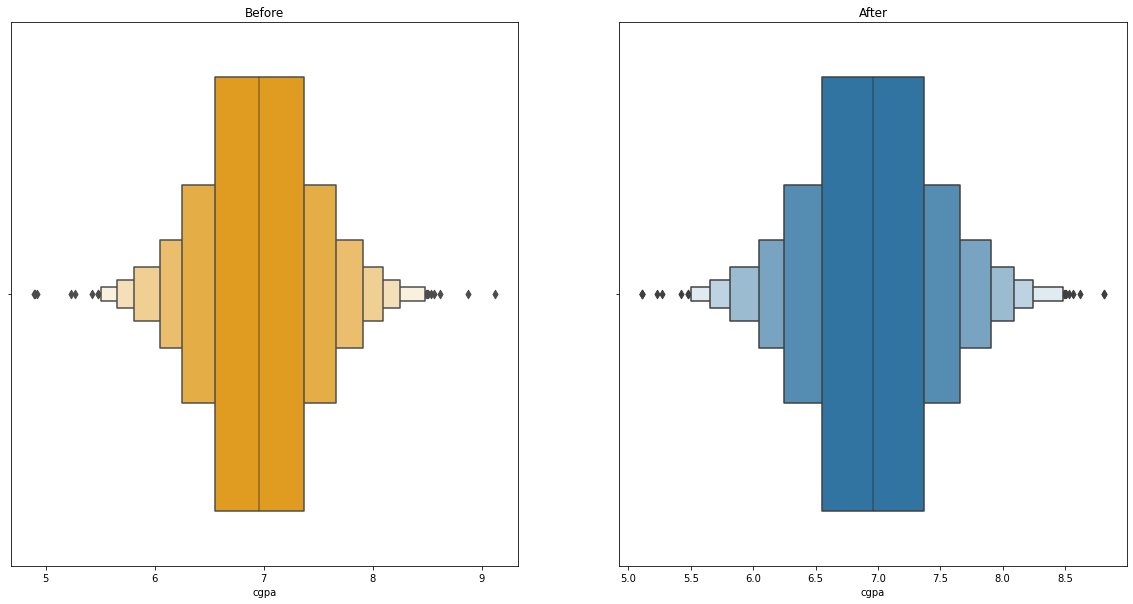

In [96]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title("Before")
sns.boxenplot(x =data.cgpa,color="orange")

plt.subplot(122)
plt.title("After")
sns.boxenplot(x = cap.cgpa)

plt.show()

# Note

## This Techniques are only work on Distribution Data
## If the data are non-Distribution than apply Mathematical_Transformations